# Improvement over EDA for Sprint 1

## 1. Cluster Analysis and Multidimensional Scale Analysis (MDS)
The first part uses cluster analysis and multidimensional scale analysis (MDS). K-means cluster analysis was used to identify which sampling sites were similar in compound and microbial composition. Use multidimensional scale analysis to visualize similarities or differences between samples, which can help reveal underlying structures in the data.

## 2. Analysis of Variance (ANOVA) and Linear Regression Analysis
The second part uses analysis of variance (ANOVA) and linear regression analysis. The ANOVA test was used to check for significant differences in bacterial and compound counts between different clusters. This helps determine if the clustering is truly differentiating between sampling sites with different compounds and microbial levels. Use regression analysis to explore the relationship between these factors and microbial and compound counts at the sampling site. Linear regression here contains two different outcomes, each representing a different treatment with different results.


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Unnamed: 0', ylabel='None'>

Text(0.5, 1.0, 'Cluster Analysis of Top 30 Sampling Locations with the Most Microbial and Compound Counts')

Text(0.5, 0, 'Sampling Location')

Text(0, 0.5, 'Total Microbial and Compound Counts')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'D_0__Bacteria;D_1__Bacteroidetes;D_2__Ignavibacteria;D_3__Ignavibacteriales;D_4__SR-FBR-L83;D_5__uncultured bacterium;D_6__uncultured bacterium'),
  Text(1, 0, 'D_0__Bacteria;D_1__Bacteroidetes;D_2__Ignavibacteria;D_3__Kryptoniales;D_4__BSV26;D_5__uncultured bacterium;D_6__uncultured bacterium'),
  Text(2, 0, 'D_0__Bacteria;D_1__Proteobacteria;D_2__Gammaproteobacteria;D_3__Betaproteobacteriales;D_4__Rhodocyclaceae;__;__'),
  Text(3, 0, 'Microbial_richness_OTUs'),
  Text(4, 0, 'D_0__Bacteria;D_1__Chloroflexi;D_2__Dehalococcoidia;D_3__Dehalococcoidales;D_4__Dehalococcoidaceae;D_5__Dehalococcoides;__'),
  Text(5, 0, 'D_0__Bacteria;D_1__Spirochaetes;D_2__Spirochaetia;D_3__Spirochaetales;D_4__Spirochaetaceae;D_5__uncultured;D_6__uncultured bacterium SJA-102'),
  Text(6, 0, 'D_0__Bacteria;D_1__Actinobacteria;D

(array([-5.0e+08,  0.0e+00,  5.0e+08,  1.0e+09,  1.5e+09,  2.0e+09,
         2.5e+09,  3.0e+09,  3.5e+09,  4.0e+09,  4.5e+09]),
 [Text(0, -500000000.0, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 500000000.0, '0.5'),
  Text(0, 1000000000.0, '1.0'),
  Text(0, 1500000000.0, '1.5'),
  Text(0, 2000000000.0, '2.0'),
  Text(0, 2500000000.0, '2.5'),
  Text(0, 3000000000.0, '3.0'),
  Text(0, 3500000000.0, '3.5'),
  Text(0, 4000000000.0, '4.0'),
  Text(0, 4500000000.0, '4.5')])

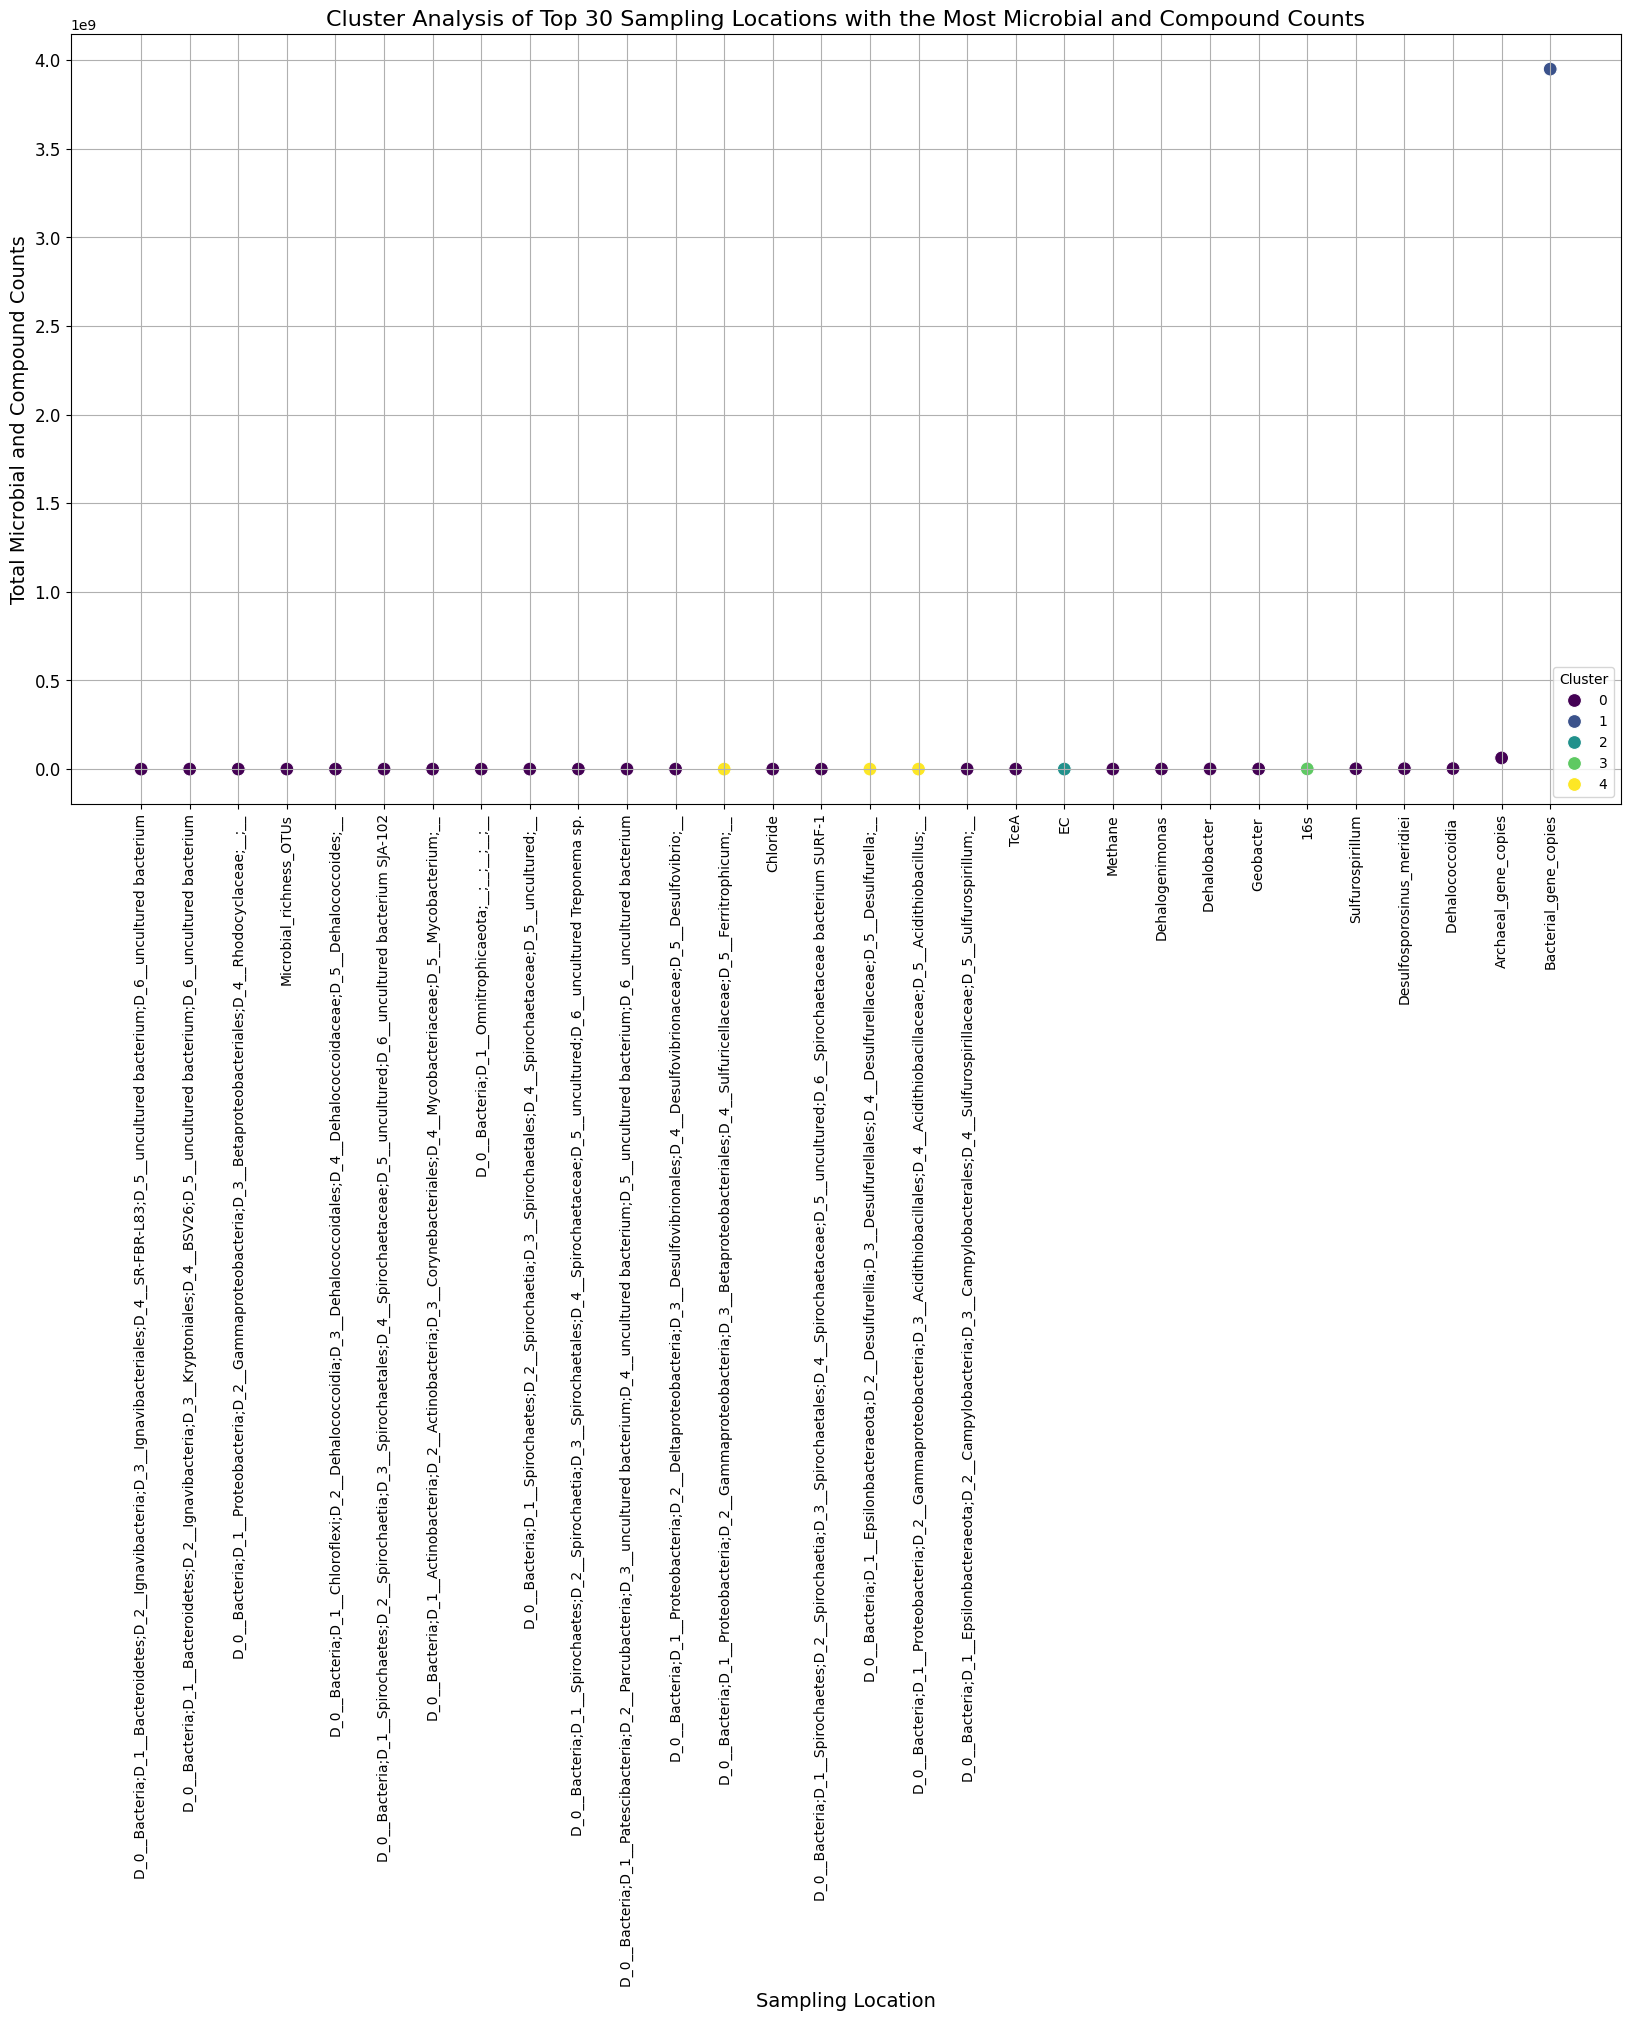

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='MDS1', ylabel='MDS2'>

Text(0.5, 1.0, 'MDS Analysis of Top 30 Sampling Locations')

Text(0.5, 0, 'MDS Dimension 1')

Text(0, 0.5, 'MDS Dimension 2')

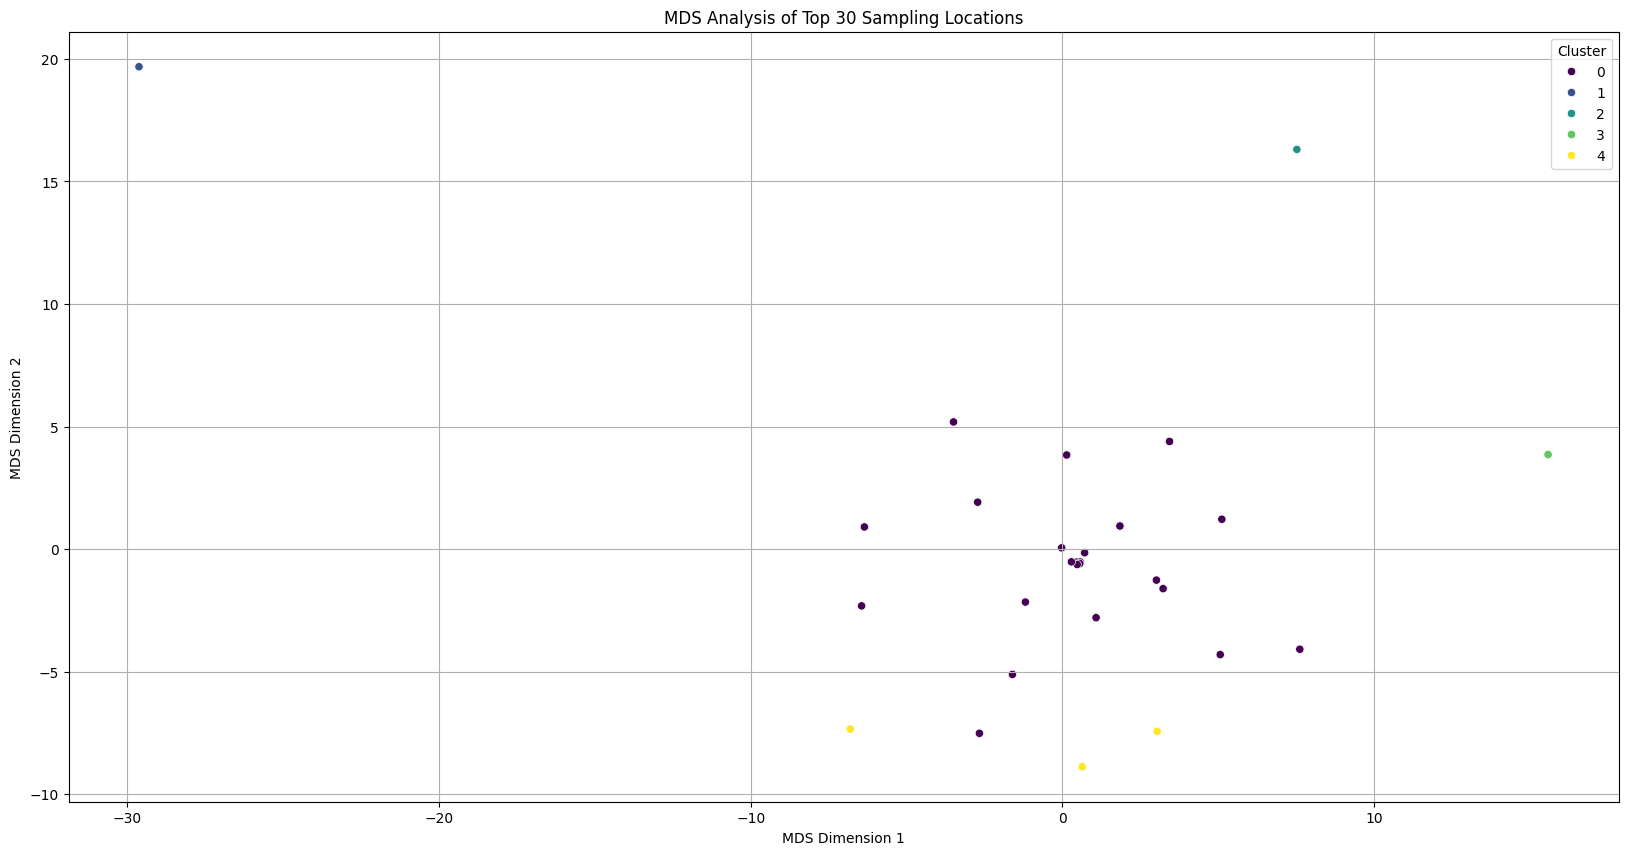

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS


# Load data
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter="\t")

# processing data
data_cleaned = data.drop(0).reset_index(drop=True)
data_cleaned.iloc[:, 1:] = data_cleaned.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Calculate the total number of bacteria at each sampling site
location_totals = data_cleaned.iloc[:, 1:].sum(axis=1)

# Select the 30 sites with the highest bacterial populations
top_30_totals = location_totals.sort_values().tail(30)
top_30_data = data_cleaned.loc[top_30_totals.index]

# standardized data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(top_30_data.iloc[:, 1:])

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
top_30_data['Cluster'] = clusters

# Visual clustering results
# Quantities in ascending order (from smallest to largest)
plt.figure(figsize=(20, 10))
sns.scatterplot(data=top_30_data, x='Unnamed: 0', y=top_30_totals, hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Analysis of Top 30 Sampling Locations with the Most Microbial and Compound Counts', fontsize=16)
plt.xlabel('Sampling Location', fontsize=14)
plt.ylabel('Total Microbial and Compound Counts', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title='Cluster', loc='lower right')
plt.show()

# Multidimensional Scale Analysis (MDS)
mds = MDS(n_components=2, random_state=0, normalized_stress=False)
mds_results = mds.fit_transform(data_scaled)
mds_df = pd.DataFrame(mds_results, columns=['MDS1', 'MDS2'])
mds_df['Cluster'] = clusters

plt.figure(figsize=(20, 10))
sns.scatterplot(x='MDS1', y='MDS2', hue='Cluster', data=mds_df, palette='viridis')
plt.title('MDS Analysis of Top 30 Sampling Locations')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Result of Sampling Locations')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

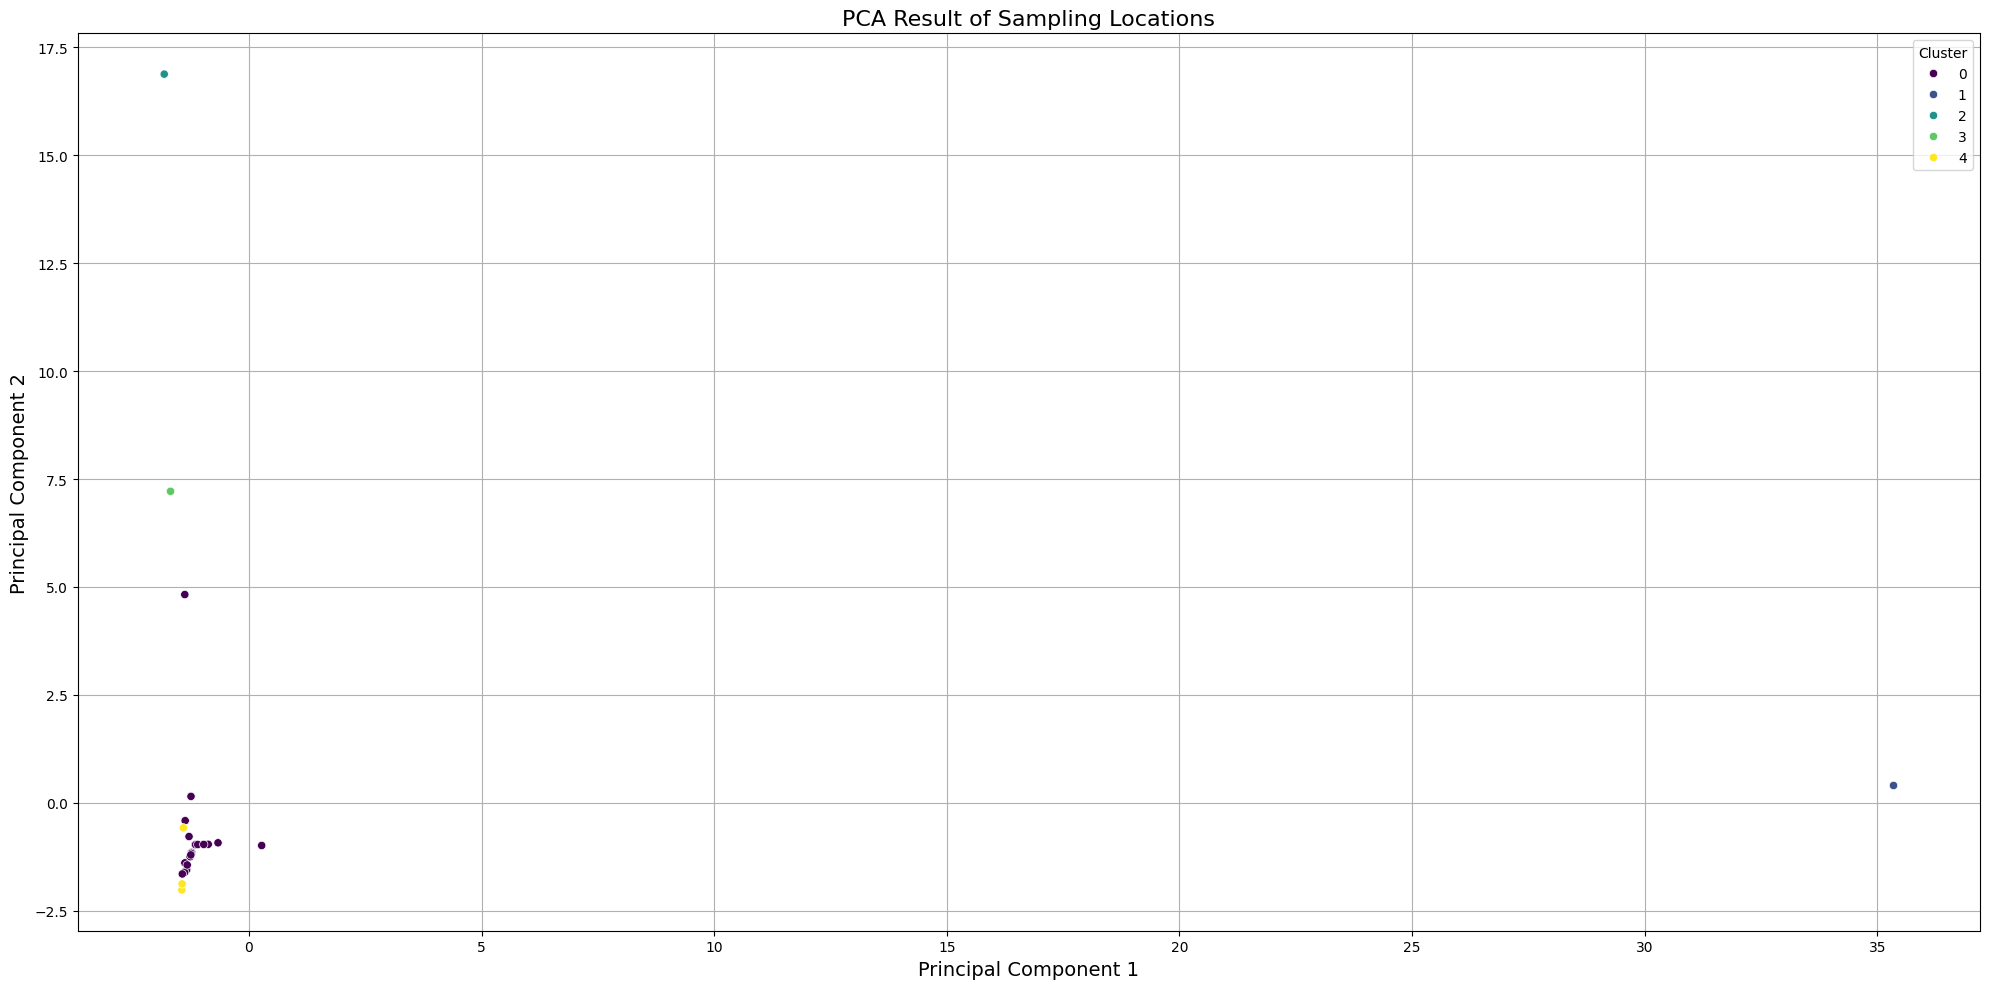

                  sum_sq    df             F        PR(>F)
C(Cluster)  1.505360e+19   4.0  25034.043141  1.246640e-44
Residual    3.758282e+15  25.0           NaN           NaN
                            OLS Regression Results                            
Dep. Variable:           Total_Counts   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                nan
Time:                        18:59:08   Log-Likelihood:                 398.46
No. Observations:                  30   AIC:                            -736.9
Df Residuals:                       0   BIC:                            -694.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    s

/Users/chenhao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/chenhao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/chenhao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/chenhao/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [23]:
# Overall, the ANOVA results showed significant differences in total bacteria and compound counts between different clusters.
# Here the regression analysis uses each observation as an independent variable. There was an overfitting problem with the results.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter="\t")

# Data preprocessing
data_cleaned = data.drop(0).reset_index(drop=True)
data_cleaned.iloc[:, 1:] = data_cleaned.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Calculate the total number of bacteria and compounds at each sampling site
location_totals = data_cleaned.iloc[:, 1:].sum(axis=1)

# Select the 30 sites with the highest bacterial and compound populations
top_30_totals = location_totals.sort_values().tail(30)
top_30_data = data_cleaned.loc[top_30_totals.index].reset_index(drop=True)
top_30_data['Total_Counts'] = pd.to_numeric(top_30_totals.values, errors='coerce')

# Standardized data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(top_30_data.iloc[:, 1:-1])  

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
top_30_data['Cluster'] = clusters

# Filter only numeric columns for correlation matrix calculation
numeric_cols = top_30_data.select_dtypes(include=[float, int]).columns

# PCA analysis and visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = top_30_data['Cluster']
plt.figure(figsize=(20, 10))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='Cluster', palette='viridis')
plt.title('PCA Result of Sampling Locations', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ANOVA analysis to check if there are significant differences between clusters
model = ols('Total_Counts ~ C(Cluster)', data=top_30_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

# Linear regression to quantify the effect of compounds and microbials on sampling locations
X = top_30_data.iloc[:, 1:-2]  
y = top_30_data['Total_Counts']

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())


In [22]:
# In the regression analysis here, PCA was used to reduce the number of independent variables. Overfitting problems are avoided.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load data
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter="\t")

# Data preprocessing
data_cleaned = data.drop(0).reset_index(drop=True)
data_cleaned.iloc[:, 1:] = data_cleaned.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Calculate the total number of bacteria and compounds at each sampling site
location_totals = data_cleaned.iloc[:, 1:].sum(axis=1)

# Select the 30 sites with the highest bacterial and compound populations
top_30_totals = location_totals.sort_values().tail(30)
top_30_data = data_cleaned.loc[top_30_totals.index].reset_index(drop=True)
top_30_data['Total_Counts'] = pd.to_numeric(top_30_totals.values, errors='coerce')

# Standardized data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(top_30_data.iloc[:, 1:-1])  

# Applying PCA for dimensionality reduction
pca = PCA(n_components=5)  
pca_result = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df['Total_Counts'] = top_30_data['Total_Counts']

# Linear regression with PCA components
X = pca_df.drop('Total_Counts', axis=1)
y = pca_df['Total_Counts']

# Add a constant term for the intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Counts   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4984.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           2.28e-35
Time:                        18:58:59   Log-Likelihood:                -549.73
No. Observations:                  30   AIC:                             1111.
Df Residuals:                      24   BIC:                             1120.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.341e+08   4.49e+06     29.891      0.0